# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 19:26:32.319435: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T19:26:35.901086
2025-04-14 19:26:35.901086


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 1
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 259
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 19:26:29"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >], dtype=object)

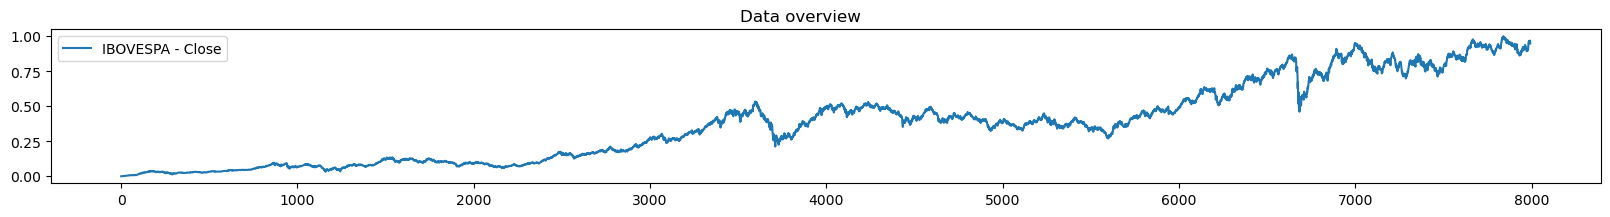

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >], dtype=object)

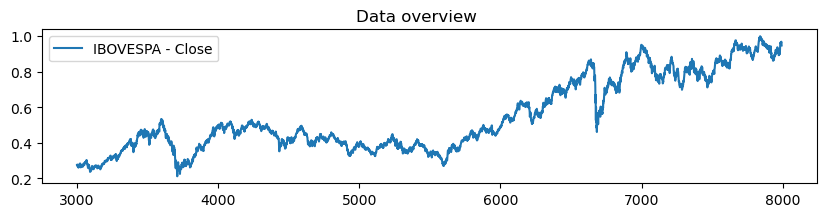

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >], dtype=object)

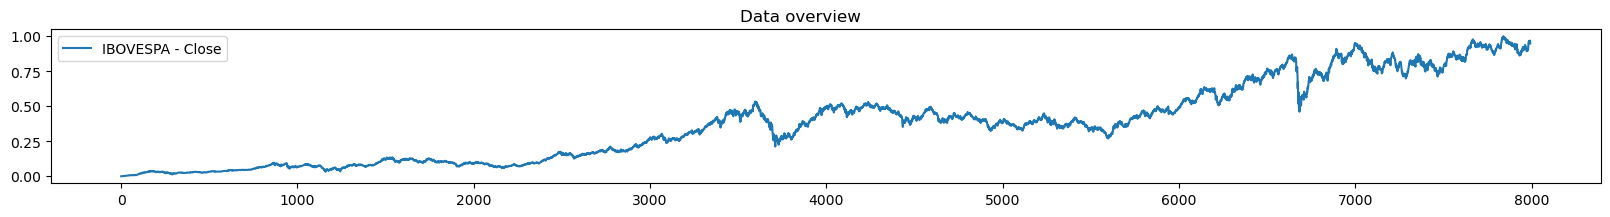

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

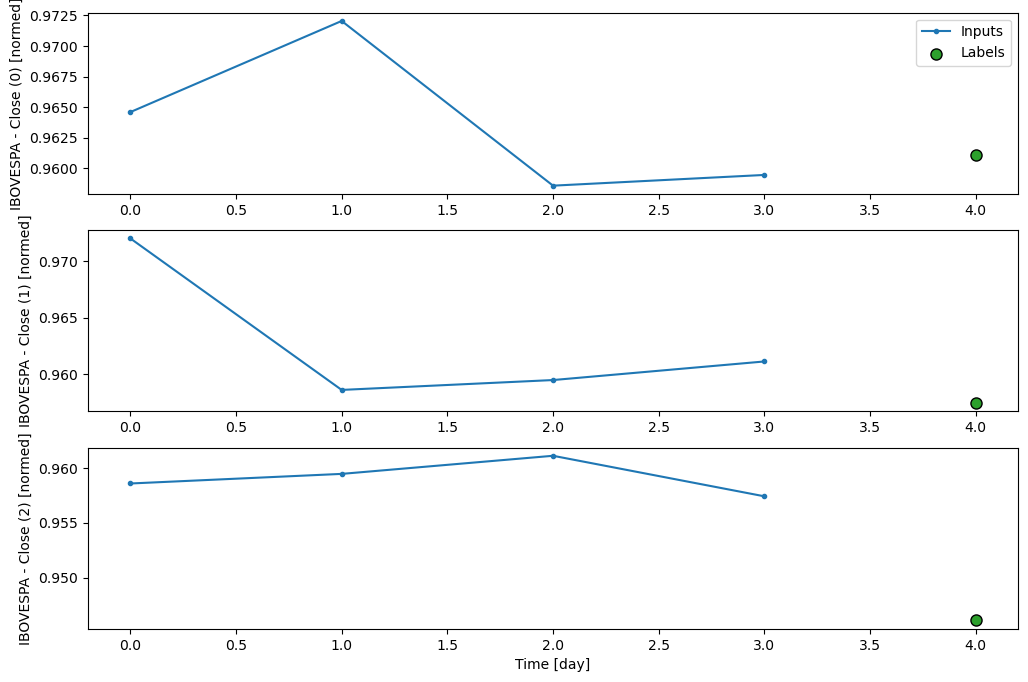

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

1

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12:04 3s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 59.6243 - mean_squared_error: 1.2926e-04 - root_mean_squared_error: 0.0101   

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 52.2250 - mean_squared_error: 1.4569e-04 - root_mean_squared_error: 0.0113

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 45.2259 - mean_squared_error: 1.4591e-04 - root_mean_squared_error: 0.0116

 43/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 41.6239 - mean_squared_error: 1.6186e-04 - root_mean_squared_error: 0.0123

 54/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 39.5397 - mean_squared_error: 2.2301e-04 - root_mean_squared_error: 0.0141

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 37.9335 - mean_squared_error: 2.6696e-04 - root_mean_squared_error: 0.0154

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 36.3088 - mean_squared_error: 2.9480e-04 - root_mean_squared_error: 0.0163

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 35.2651 - mean_squared_error: 3.3998e-04 - root_mean_squared_error: 0.0174

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 34.1816 - mean_squared_error: 3.8292e-04 - root_mean_squared_error: 0.0185

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 33.2895 - mean_squared_error: 4.2758e-04 - root_mean_squared_error: 0.0195

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 32.5447 - mean_squared_error: 4.8127e-04 - root_mean_squared_error: 0.0206

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 31.8202 - mean_squared_error: 5.7316e-04 - root_mean_squared_error: 0.0222

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 31.2474 - mean_squared_error: 7.7821e-04 - root_mean_squared_error: 0.0248

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 30.7531 - mean_squared_error: 9.4690e-04 - root_mean_squared_error: 0.0269

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 30.2742 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288    

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 29.8569 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 29.4045 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 28.8835 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0334

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 28.4490 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0348

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 28.0013 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 27.6010 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0374

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 27.1568 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 26.7979 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 26.6208 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0408 - val_loss: 0.0754 - val_mean_absolute_error: 0.0754 - val_mean_absolute_percentage_error: 8.0282 - val_mean_squared_error: 0.0067 - val_root_mean_squared_error: 0.0818


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.6543 - mean_absolute_error: 0.6543 - mean_absolute_percentage_error: 30694.8789 - mean_squared_error: 0.4281 - root_mean_squared_error: 0.6543

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6301 - mean_absolute_error: 0.6301 - mean_absolute_percentage_error: 12053.5801 - mean_squared_error: 0.3987 - root_mean_squared_error: 0.6310 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5672 - mean_absolute_error: 0.5672 - mean_absolute_percentage_error: 8394.4834 - mean_squared_error: 0.3382 - root_mean_squared_error: 0.5781 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5004 - mean_absolute_error: 0.5004 - mean_absolute_percentage_error: 6592.2964 - mean_squared_error: 0.2865 - root_mean_squared_error: 0.5276

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4451 - mean_absolute_error: 0.4451 - mean_absolute_percentage_error: 5483.4351 - mean_squared_error: 0.2482 - root_mean_squared_error: 0.4866

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3966 - mean_absolute_error: 0.3966 - mean_absolute_percentage_error: 4660.1929 - mean_squared_error: 0.2169 - root_mean_squared_error: 0.4506

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3615 - mean_absolute_error: 0.3615 - mean_absolute_percentage_error: 4118.3271 - mean_squared_error: 0.1952 - root_mean_squared_error: 0.4241

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3300 - mean_absolute_error: 0.3300 - mean_absolute_percentage_error: 3663.7485 - mean_squared_error: 0.1762 - root_mean_squared_error: 0.3999

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3087 - mean_absolute_error: 0.3087 - mean_absolute_percentage_error: 3367.1814 - mean_squared_error: 0.1635 - root_mean_squared_error: 0.3830

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2885 - mean_absolute_error: 0.2885 - mean_absolute_percentage_error: 3094.5095 - mean_squared_error: 0.1516 - root_mean_squared_error: 0.3666

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2712 - mean_absolute_error: 0.2712 - mean_absolute_percentage_error: 2866.7656 - mean_squared_error: 0.1415 - root_mean_squared_error: 0.3522

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2550 - mean_absolute_error: 0.2550 - mean_absolute_percentage_error: 2655.5781 - mean_squared_error: 0.1320 - root_mean_squared_error: 0.3383

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2427 - mean_absolute_error: 0.2427 - mean_absolute_percentage_error: 2491.5203 - mean_squared_error: 0.1246 - root_mean_squared_error: 0.3273

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2320 - mean_absolute_error: 0.2320 - mean_absolute_percentage_error: 2348.5234 - mean_squared_error: 0.1181 - root_mean_squared_error: 0.3174

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2224 - mean_absolute_error: 0.2224 - mean_absolute_percentage_error: 2222.5813 - mean_squared_error: 0.1124 - root_mean_squared_error: 0.3085

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 2100.2249 - mean_squared_error: 0.1067 - root_mean_squared_error: 0.2995

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2054 - mean_absolute_error: 0.2054 - mean_absolute_percentage_error: 2001.2056 - mean_squared_error: 0.1021 - root_mean_squared_error: 0.2921

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1983 - mean_absolute_error: 0.1983 - mean_absolute_percentage_error: 1911.9735 - mean_squared_error: 0.0980 - root_mean_squared_error: 0.2851

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1919 - mean_absolute_error: 0.1919 - mean_absolute_percentage_error: 1831.1132 - mean_squared_error: 0.0942 - root_mean_squared_error: 0.2787

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1867 - mean_absolute_error: 0.1867 - mean_absolute_percentage_error: 1764.5442 - mean_squared_error: 0.0910 - root_mean_squared_error: 0.2734

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1809 - mean_absolute_error: 0.1809 - mean_absolute_percentage_error: 1690.1016 - mean_squared_error: 0.0875 - root_mean_squared_error: 0.2673

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1761 - mean_absolute_error: 0.1761 - mean_absolute_percentage_error: 1628.1829 - mean_squared_error: 0.0846 - root_mean_squared_error: 0.2622

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1713 - mean_absolute_error: 0.1713 - mean_absolute_percentage_error: 1565.6029 - mean_squared_error: 0.0816 - root_mean_squared_error: 0.2570

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1673 - mean_absolute_error: 0.1673 - mean_absolute_percentage_error: 1513.1309 - mean_squared_error: 0.0791 - root_mean_squared_error: 0.2525


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1658 - mean_absolute_error: 0.1658 - mean_absolute_percentage_error: 1493.2203 - mean_squared_error: 0.0782 - root_mean_squared_error: 0.2508 - val_loss: 0.0776 - val_mean_absolute_error: 0.0776 - val_mean_absolute_percentage_error: 8.2751 - val_mean_squared_error: 0.0068 - val_root_mean_squared_error: 0.0825


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5199 - mean_absolute_error: 0.5199 - mean_absolute_percentage_error: 24391.3145 - mean_squared_error: 0.2702 - root_mean_squared_error: 0.5199

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5067 - mean_absolute_error: 0.5067 - mean_absolute_percentage_error: 9590.3779 - mean_squared_error: 0.2570 - root_mean_squared_error: 0.5069  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4790 - mean_absolute_error: 0.4790 - mean_absolute_percentage_error: 6764.4307 - mean_squared_error: 0.2328 - root_mean_squared_error: 0.4814

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4329 - mean_absolute_error: 0.4329 - mean_absolute_percentage_error: 5356.3291 - mean_squared_error: 0.2034 - root_mean_squared_error: 0.4474

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3848 - mean_absolute_error: 0.3848 - mean_absolute_percentage_error: 4405.2241 - mean_squared_error: 0.1767 - root_mean_squared_error: 0.4135

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3484 - mean_absolute_error: 0.3484 - mean_absolute_percentage_error: 3816.0703 - mean_squared_error: 0.1578 - root_mean_squared_error: 0.3880

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3212 - mean_absolute_error: 0.3212 - mean_absolute_percentage_error: 3417.8413 - mean_squared_error: 0.1442 - root_mean_squared_error: 0.3685

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3005 - mean_absolute_error: 0.3005 - mean_absolute_percentage_error: 3134.2505 - mean_squared_error: 0.1341 - root_mean_squared_error: 0.3534

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2785 - mean_absolute_error: 0.2785 - mean_absolute_percentage_error: 2845.8372 - mean_squared_error: 0.1235 - root_mean_squared_error: 0.3370

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2599 - mean_absolute_error: 0.2599 - mean_absolute_percentage_error: 2610.9724 - mean_squared_error: 0.1146 - root_mean_squared_error: 0.3228

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2440 - mean_absolute_error: 0.2440 - mean_absolute_percentage_error: 2415.5242 - mean_squared_error: 0.1070 - root_mean_squared_error: 0.3103

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2303 - mean_absolute_error: 0.2303 - mean_absolute_percentage_error: 2250.0295 - mean_squared_error: 0.1005 - root_mean_squared_error: 0.2991

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2183 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 2107.8958 - mean_squared_error: 0.0948 - root_mean_squared_error: 0.2892

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2069 - mean_absolute_error: 0.2069 - mean_absolute_percentage_error: 1972.9286 - mean_squared_error: 0.0893 - root_mean_squared_error: 0.2794

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1972 - mean_absolute_error: 0.1972 - mean_absolute_percentage_error: 1855.8524 - mean_squared_error: 0.0845 - root_mean_squared_error: 0.2707

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1886 - mean_absolute_error: 0.1886 - mean_absolute_percentage_error: 1753.2047 - mean_squared_error: 0.0803 - root_mean_squared_error: 0.2628

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1822 - mean_absolute_error: 0.1822 - mean_absolute_percentage_error: 1678.1066 - mean_squared_error: 0.0772 - root_mean_squared_error: 0.2569

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1751 - mean_absolute_error: 0.1751 - mean_absolute_percentage_error: 1595.4478 - mean_squared_error: 0.0737 - root_mean_squared_error: 0.2502

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1692 - mean_absolute_error: 0.1692 - mean_absolute_percentage_error: 1527.7441 - mean_squared_error: 0.0709 - root_mean_squared_error: 0.2445

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1639 - mean_absolute_error: 0.1639 - mean_absolute_percentage_error: 1466.1056 - mean_squared_error: 0.0683 - root_mean_squared_error: 0.2393

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1590 - mean_absolute_error: 0.1590 - mean_absolute_percentage_error: 1409.7186 - mean_squared_error: 0.0659 - root_mean_squared_error: 0.2344

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1545 - mean_absolute_error: 0.1545 - mean_absolute_percentage_error: 1357.9186 - mean_squared_error: 0.0636 - root_mean_squared_error: 0.2298

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1507 - mean_absolute_error: 0.1507 - mean_absolute_percentage_error: 1314.7614 - mean_squared_error: 0.0618 - root_mean_squared_error: 0.2259

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1473 - mean_absolute_error: 0.1473 - mean_absolute_percentage_error: 1274.5288 - mean_squared_error: 0.0601 - root_mean_squared_error: 0.2223


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1441 - mean_absolute_error: 0.1441 - mean_absolute_percentage_error: 1236.9319 - mean_squared_error: 0.0584 - root_mean_squared_error: 0.2188 - val_loss: 0.0206 - val_mean_absolute_error: 0.0206 - val_mean_absolute_percentage_error: 2.2959 - val_mean_squared_error: 6.6121e-04 - val_root_mean_squared_error: 0.0257


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2793 - mean_absolute_error: 0.2793 - mean_absolute_percentage_error: 13103.5117 - mean_squared_error: 0.0780 - root_mean_squared_error: 0.2793

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2497 - mean_absolute_error: 0.2497 - mean_absolute_percentage_error: 5049.8555 - mean_squared_error: 0.0645 - root_mean_squared_error: 0.2530  

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2054 - mean_absolute_error: 0.2054 - mean_absolute_percentage_error: 3337.5574 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.2177

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1761 - mean_absolute_error: 0.1761 - mean_absolute_percentage_error: 2612.5007 - mean_squared_error: 0.0403 - root_mean_squared_error: 0.1950

 43/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1521 - mean_absolute_error: 0.1521 - mean_absolute_percentage_error: 2132.4380 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1767

 54/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1342 - mean_absolute_error: 0.1342 - mean_absolute_percentage_error: 1814.1843 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1628

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 1604.0649 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1528

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 1427.4260 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1437

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - mean_absolute_percentage_error: 1300.4425 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1368

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - mean_absolute_percentage_error: 1186.7990 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1302

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 1101.0211 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1251

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 1021.2112 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1202

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 959.0140 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1164 

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 914.9946 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1136

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 879.9868 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1114

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 834.8106 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1085

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 794.4660 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1058

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 754.7623 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1030

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 719.1872 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1005

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 687.1076 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0982

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 660.5498 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0962

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 640.8715 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0947

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 620.2167 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0931

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 598.9128 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0915


Epoch: 4 - LR: 0.009045630693435669
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 584.9337 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0903 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1558 - val_mean_squared_error: 1.7785e-04 - val_root_mean_squared_error: 0.0133


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 29s 126ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 3241.7603 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0689

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 1641.7406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0572  

 10/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 1235.7450 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0518

 15/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 971.6416 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0475 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 840.3983 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0452

 28/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 654.5090 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0408

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 563.1395 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0382 

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 504.8445 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 472.9625 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 438.9648 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 399.6562 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 359.4178 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307 

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 333.9620 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 312.2628 - mean_squared_error: 9.4532e-04 - root_mean_squared_error: 0.0287

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 296.0250 - mean_squared_error: 9.0205e-04 - root_mean_squared_error: 0.0280

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 277.0973 - mean_squared_error: 8.5112e-04 - root_mean_squared_error: 0.0271

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 262.6223 - mean_squared_error: 8.1209e-04 - root_mean_squared_error: 0.0264

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 251.4934 - mean_squared_error: 7.8202e-04 - root_mean_squared_error: 0.0258

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 239.7673 - mean_squared_error: 7.5041e-04 - root_mean_squared_error: 0.0252

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 229.2004 - mean_squared_error: 7.2214e-04 - root_mean_squared_error: 0.0247

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 218.3302 - mean_squared_error: 6.9358e-04 - root_mean_squared_error: 0.0242

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 209.7178 - mean_squared_error: 6.7109e-04 - root_mean_squared_error: 0.0238

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 200.7552 - mean_squared_error: 6.4768e-04 - root_mean_squared_error: 0.0233

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 195.5736 - mean_squared_error: 6.3416e-04 - root_mean_squared_error: 0.0231

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 190.6803 - mean_squared_error: 6.2131e-04 - root_mean_squared_error: 0.0228

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 186.9570 - mean_squared_error: 6.1147e-04 - root_mean_squared_error: 0.0226

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 180.8148 - mean_squared_error: 5.9512e-04 - root_mean_squared_error: 0.0223

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 174.3212 - mean_squared_error: 5.7774e-04 - root_mean_squared_error: 0.0220

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 168.3246 - mean_squared_error: 5.6159e-04 - root_mean_squared_error: 0.0216

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 162.7687 - mean_squared_error: 5.4660e-04 - root_mean_squared_error: 0.0213

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 156.9843 - mean_squared_error: 5.3100e-04 - root_mean_squared_error: 0.0210

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 151.0690 - mean_squared_error: 5.1534e-04 - root_mean_squared_error: 0.0207

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 146.6838 - mean_squared_error: 5.0517e-04 - root_mean_squared_error: 0.0205

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 142.5752 - mean_squared_error: 4.9762e-04 - root_mean_squared_error: 0.0204

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 139.1863 - mean_squared_error: 4.9274e-04 - root_mean_squared_error: 0.0203


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 135.5273 - mean_squared_error: 4.8776e-04 - root_mean_squared_error: 0.0202 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.8016 - val_mean_squared_error: 8.3344e-05 - val_root_mean_squared_error: 0.0091


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 4225.5415 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 1546.1503 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0680 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 1103.1460 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0584

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 854.5535 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0517 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 705.6920 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0471

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 605.5920 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0436

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 540.0157 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 488.5671 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 446.9683 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0374

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 412.5558 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 380.2434 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 350.3291 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 325.2077 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 301.8149 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 281.8991 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 267.6610 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 254.9315 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 242.2675 - mean_squared_error: 9.6830e-04 - root_mean_squared_error: 0.0281

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 229.8474 - mean_squared_error: 9.3058e-04 - root_mean_squared_error: 0.0275

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 219.7143 - mean_squared_error: 8.9915e-04 - root_mean_squared_error: 0.0271

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 210.5198 - mean_squared_error: 8.7014e-04 - root_mean_squared_error: 0.0266

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 202.1349 - mean_squared_error: 8.4332e-04 - root_mean_squared_error: 0.0262

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 193.7218 - mean_squared_error: 8.1625e-04 - root_mean_squared_error: 0.0258

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 186.7164 - mean_squared_error: 7.9392e-04 - root_mean_squared_error: 0.0254

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 179.6281 - mean_squared_error: 7.7161e-04 - root_mean_squared_error: 0.0251


Epoch: 6 - LR: 0.008603165857493877


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 174.2558 - mean_squared_error: 7.5473e-04 - root_mean_squared_error: 0.0248 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 1.0000 - val_mean_squared_error: 1.3205e-04 - val_root_mean_squared_error: 0.0115


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 4311.6230 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0917

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 1597.4976 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723 

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 1034.0793 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0590

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 801.5049 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0518 

 43/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 650.5143 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0464

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 559.2475 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0428

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 486.7680 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 436.8908 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 400.8224 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 373.8764 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 342.7703 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 319.0725 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 298.7429 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 281.1095 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 265.6384 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 250.6550 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 237.4244 - mean_squared_error: 9.8182e-04 - root_mean_squared_error: 0.0278

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 224.6434 - mean_squared_error: 9.3850e-04 - root_mean_squared_error: 0.0272

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 214.1984 - mean_squared_error: 9.0397e-04 - root_mean_squared_error: 0.0267

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 204.7743 - mean_squared_error: 8.7313e-04 - root_mean_squared_error: 0.0262

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 196.9652 - mean_squared_error: 8.4747e-04 - root_mean_squared_error: 0.0259

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 189.1035 - mean_squared_error: 8.2387e-04 - root_mean_squared_error: 0.0255

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 181.9083 - mean_squared_error: 8.0468e-04 - root_mean_squared_error: 0.0253


Epoch: 7 - LR: 0.00839011650532484


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 176.4573 - mean_squared_error: 7.9057e-04 - root_mean_squared_error: 0.0251 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 1.0053 - val_mean_squared_error: 1.3552e-04 - val_root_mean_squared_error: 0.0116


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1322 - mean_absolute_error: 0.1322 - mean_absolute_percentage_error: 6208.4873 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1322

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 2217.3167 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1078 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0823 - mean_absolute_error: 0.0823 - mean_absolute_percentage_error: 1477.5280 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0904

 34/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 1135.0046 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0794

 45/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 931.9016 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0718 

 55/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 806.2808 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0665

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 713.2089 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0623

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 641.1827 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0588

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 583.5944 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0559

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 536.3799 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0534

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 496.8944 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0512

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 463.3319 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0493

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 437.1402 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0478

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 411.6263 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0463

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 389.1922 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0450

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 369.2946 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0438

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 349.8370 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0425

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 334.0041 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0415

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 321.0417 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 306.6228 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0397

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 294.6930 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0389

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 283.7388 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0382

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 273.6417 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 264.3020 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0368


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 260.7605 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0366 - val_loss: 0.0079 - val_mean_absolute_error: 0.0079 - val_mean_absolute_percentage_error: 0.8463 - val_mean_squared_error: 9.5840e-05 - val_root_mean_squared_error: 0.0098


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 3821.9873 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0813

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 1412.9230 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 950.6422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0538 

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 720.0794 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0474

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 597.1253 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0434

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 506.3667 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 446.8801 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0375

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 401.2328 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 368.2701 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 338.0698 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 312.9127 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 291.5844 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 274.9697 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 258.8174 - mean_squared_error: 9.8403e-04 - root_mean_squared_error: 0.0284

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 244.6378 - mean_squared_error: 9.3712e-04 - root_mean_squared_error: 0.0277

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 232.0766 - mean_squared_error: 8.9527e-04 - root_mean_squared_error: 0.0270

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 219.8060 - mean_squared_error: 8.5396e-04 - root_mean_squared_error: 0.0263

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 210.7824 - mean_squared_error: 8.2333e-04 - root_mean_squared_error: 0.0258

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 201.6693 - mean_squared_error: 7.9221e-04 - root_mean_squared_error: 0.0253

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 192.5990 - mean_squared_error: 7.6112e-04 - root_mean_squared_error: 0.0247

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 184.3851 - mean_squared_error: 7.3291e-04 - root_mean_squared_error: 0.0242

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 177.5607 - mean_squared_error: 7.0981e-04 - root_mean_squared_error: 0.0238

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 171.2727 - mean_squared_error: 6.8915e-04 - root_mean_squared_error: 0.0235

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 165.4574 - mean_squared_error: 6.7030e-04 - root_mean_squared_error: 0.0231


Epoch: 9 - LR: 0.007979716174304485


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 162.1738 - mean_squared_error: 6.5970e-04 - root_mean_squared_error: 0.0230 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0924 - val_mean_squared_error: 1.5209e-04 - val_root_mean_squared_error: 0.0123


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 3738.7412 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0796

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 1383.8925 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 926.6049 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0522 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 715.4243 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0463

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 590.2296 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0423

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 506.1046 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 444.9520 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 398.3119 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 361.4416 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 331.4368 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 306.4913 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 285.3868 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 277.8205 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 262.3289 - mean_squared_error: 9.6586e-04 - root_mean_squared_error: 0.0282

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 247.2199 - mean_squared_error: 9.1678e-04 - root_mean_squared_error: 0.0274

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 233.9209 - mean_squared_error: 8.7360e-04 - root_mean_squared_error: 0.0267

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 221.0057 - mean_squared_error: 8.3150e-04 - root_mean_squared_error: 0.0260

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 210.5577 - mean_squared_error: 7.9715e-04 - root_mean_squared_error: 0.0254

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 200.2558 - mean_squared_error: 7.6306e-04 - root_mean_squared_error: 0.0248

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 191.8119 - mean_squared_error: 7.3509e-04 - root_mean_squared_error: 0.0243

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 184.1198 - mean_squared_error: 7.0969e-04 - root_mean_squared_error: 0.0239

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 177.0802 - mean_squared_error: 6.8665e-04 - root_mean_squared_error: 0.0234

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 170.6110 - mean_squared_error: 6.6604e-04 - root_mean_squared_error: 0.0231

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 164.6437 - mean_squared_error: 6.4753e-04 - root_mean_squared_error: 0.0227

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 158.5897 - mean_squared_error: 6.2897e-04 - root_mean_squared_error: 0.0224


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 157.5424 - mean_squared_error: 6.2575e-04 - root_mean_squared_error: 0.0224 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0951 - val_mean_squared_error: 1.5154e-04 - val_root_mean_squared_error: 0.0123


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 3144.7454 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0669

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 1161.3938 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0521 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 785.1556 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0448 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 607.8030 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 501.6341 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 430.1041 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 378.1070 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 338.4655 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 307.1540 - mean_squared_error: 9.4028e-04 - root_mean_squared_error: 0.0284

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 281.6705 - mean_squared_error: 8.6869e-04 - root_mean_squared_error: 0.0271

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 258.5590 - mean_squared_error: 8.0330e-04 - root_mean_squared_error: 0.0260

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 240.9192 - mean_squared_error: 7.5345e-04 - root_mean_squared_error: 0.0250

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 225.7635 - mean_squared_error: 7.1117e-04 - root_mean_squared_error: 0.0242

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 212.5975 - mean_squared_error: 6.7641e-04 - root_mean_squared_error: 0.0236

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 199.9534 - mean_squared_error: 6.4370e-04 - root_mean_squared_error: 0.0230

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 189.8207 - mean_squared_error: 6.1724e-04 - root_mean_squared_error: 0.0225

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 180.7628 - mean_squared_error: 5.9329e-04 - root_mean_squared_error: 0.0221

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 172.6141 - mean_squared_error: 5.7165e-04 - root_mean_squared_error: 0.0216

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 165.2406 - mean_squared_error: 5.5199e-04 - root_mean_squared_error: 0.0213

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 158.5338 - mean_squared_error: 5.3419e-04 - root_mean_squared_error: 0.0209

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 152.4052 - mean_squared_error: 5.1834e-04 - root_mean_squared_error: 0.0206

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 146.7795 - mean_squared_error: 5.0418e-04 - root_mean_squared_error: 0.0203

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 141.5956 - mean_squared_error: 4.9161e-04 - root_mean_squared_error: 0.0201

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 136.8014 - mean_squared_error: 4.8022e-04 - root_mean_squared_error: 0.0199


Epoch: 11 - LR: 0.007589389570057392
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 134.0942 - mean_squared_error: 4.7383e-04 - root_mean_squared_error: 0.0197 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.8046 - val_mean_squared_error: 8.6276e-05 - val_root_mean_squared_error: 0.0093


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 4628.3984 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0986

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 1736.8723 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0814 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 1173.1483 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0699

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 909.3857 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0625 

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 750.8998 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0570

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 643.8444 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0528

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 566.0026 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0494

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 506.5776 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0467

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 459.5453 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0443

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 421.2743 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 389.4568 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 365.0432 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 341.6012 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 323.1787 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 305.1206 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 289.1579 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 273.5963 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 262.1717 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 250.6499 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 240.1907 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 230.6487 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 221.9052 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0302

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 213.8639 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 207.1578 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 199.5671 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288 - val_loss: 0.0112 - val_mean_absolute_error: 0.0112 - val_mean_absolute_percentage_error: 1.2003 - val_mean_squared_error: 1.7669e-04 - val_root_mean_squared_error: 0.0133


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 2541.7205 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0541

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 981.3048 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0416  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 644.6568 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 481.5168 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 396.1749 - mean_squared_error: 8.5717e-04 - root_mean_squared_error: 0.0277

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 343.7226 - mean_squared_error: 7.5342e-04 - root_mean_squared_error: 0.0257

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 297.3403 - mean_squared_error: 6.5952e-04 - root_mean_squared_error: 0.0238

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 265.7567 - mean_squared_error: 5.9433e-04 - root_mean_squared_error: 0.0224

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 240.8199 - mean_squared_error: 5.4214e-04 - root_mean_squared_error: 0.0213

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 220.5772 - mean_squared_error: 4.9944e-04 - root_mean_squared_error: 0.0203

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 203.7894 - mean_squared_error: 4.6428e-04 - root_mean_squared_error: 0.0195

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 189.6207 - mean_squared_error: 4.3545e-04 - root_mean_squared_error: 0.0188

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 177.4892 - mean_squared_error: 4.1244e-04 - root_mean_squared_error: 0.0183

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 167.9766 - mean_squared_error: 3.9856e-04 - root_mean_squared_error: 0.0180

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 161.3371 - mean_squared_error: 3.9128e-04 - root_mean_squared_error: 0.0179

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 153.6159 - mean_squared_error: 3.8323e-04 - root_mean_squared_error: 0.0178

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 145.9483 - mean_squared_error: 3.7518e-04 - root_mean_squared_error: 0.0177

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 139.0828 - mean_squared_error: 3.6730e-04 - root_mean_squared_error: 0.0176

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 132.8970 - mean_squared_error: 3.5972e-04 - root_mean_squared_error: 0.0175

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 127.2909 - mean_squared_error: 3.5238e-04 - root_mean_squared_error: 0.0173

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 122.1831 - mean_squared_error: 3.4531e-04 - root_mean_squared_error: 0.0172

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 117.5084 - mean_squared_error: 3.3859e-04 - root_mean_squared_error: 0.0170

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 113.2129 - mean_squared_error: 3.3252e-04 - root_mean_squared_error: 0.0169

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 109.2506 - mean_squared_error: 3.2691e-04 - root_mean_squared_error: 0.0168

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 105.5831 - mean_squared_error: 3.2169e-04 - root_mean_squared_error: 0.0167


Epoch: 13 - LR: 0.007218156475573778
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 104.5360 - mean_squared_error: 3.2018e-04 - root_mean_squared_error: 0.0167 - val_loss: 0.0083 - val_mean_absolute_error: 0.0083 - val_mean_absolute_percentage_error: 0.8921 - val_mean_squared_error: 1.0488e-04 - val_root_mean_squared_error: 0.0102


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 1555.0726 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0330

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 549.7905 - mean_squared_error: 5.5420e-04 - root_mean_squared_error: 0.0229

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 349.6739 - mean_squared_error: 3.6697e-04 - root_mean_squared_error: 0.0181

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 268.9209 - mean_squared_error: 2.8661e-04 - root_mean_squared_error: 0.0157

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 220.9963 - mean_squared_error: 2.3813e-04 - root_mean_squared_error: 0.0141

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 188.9674 - mean_squared_error: 2.0607e-04 - root_mean_squared_error: 0.0131

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 165.8431 - mean_squared_error: 1.8307e-04 - root_mean_squared_error: 0.0122

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 146.7629 - mean_squared_error: 1.6402e-04 - root_mean_squared_error: 0.0115

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 134.4673 - mean_squared_error: 1.5176e-04 - root_mean_squared_error: 0.0111

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 123.2402 - mean_squared_error: 1.4052e-04 - root_mean_squared_error: 0.0106

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 113.9197 - mean_squared_error: 1.3128e-04 - root_mean_squared_error: 0.0102

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 106.0435 - mean_squared_error: 1.2376e-04 - root_mean_squared_error: 0.0099

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 99.2935 - mean_squared_error: 1.1789e-04 - root_mean_squared_error: 0.0097 

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 93.4378 - mean_squared_error: 1.1319e-04 - root_mean_squared_error: 0.0095

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 88.3021 - mean_squared_error: 1.0930e-04 - root_mean_squared_error: 0.0094

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 83.7584 - mean_squared_error: 1.0606e-04 - root_mean_squared_error: 0.0093

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 79.7047 - mean_squared_error: 1.0311e-04 - root_mean_squared_error: 0.0092

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 76.0641 - mean_squared_error: 1.0045e-04 - root_mean_squared_error: 0.0091

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 72.7751 - mean_squared_error: 9.8037e-05 - root_mean_squared_error: 0.0090

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 69.7878 - mean_squared_error: 9.5916e-05 - root_mean_squared_error: 0.0089

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 67.0616 - mean_squared_error: 9.4182e-05 - root_mean_squared_error: 0.0089

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 64.5629 - mean_squared_error: 9.3029e-05 - root_mean_squared_error: 0.0089

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 62.2643 - mean_squared_error: 9.2600e-05 - root_mean_squared_error: 0.0089

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 60.1409 - mean_squared_error: 9.2447e-05 - root_mean_squared_error: 0.0089


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 58.7483 - mean_squared_error: 9.2427e-05 - root_mean_squared_error: 0.0089 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 0.8407 - val_mean_squared_error: 9.6275e-05 - val_root_mean_squared_error: 0.0098


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 2333.7158 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0497

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 958.8165 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0393   

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 635.9993 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0337

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 478.8171 - mean_squared_error: 9.5354e-04 - root_mean_squared_error: 0.0298

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 389.2818 - mean_squared_error: 8.0152e-04 - root_mean_squared_error: 0.0271

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 330.6891 - mean_squared_error: 6.9596e-04 - root_mean_squared_error: 0.0250

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 296.2994 - mean_squared_error: 6.3188e-04 - root_mean_squared_error: 0.0237

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 263.1169 - mean_squared_error: 5.6848e-04 - root_mean_squared_error: 0.0223

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 237.3481 - mean_squared_error: 5.1835e-04 - root_mean_squared_error: 0.0212

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 216.6601 - mean_squared_error: 4.7750e-04 - root_mean_squared_error: 0.0202

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 199.6223 - mean_squared_error: 4.4342e-04 - root_mean_squared_error: 0.0194

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 185.3254 - mean_squared_error: 4.1485e-04 - root_mean_squared_error: 0.0187

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 173.1356 - mean_squared_error: 3.9075e-04 - root_mean_squared_error: 0.0181

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 162.6132 - mean_squared_error: 3.7075e-04 - root_mean_squared_error: 0.0176

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 153.4266 - mean_squared_error: 3.5408e-04 - root_mean_squared_error: 0.0172

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 146.0914 - mean_squared_error: 3.4085e-04 - root_mean_squared_error: 0.0168

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 138.8022 - mean_squared_error: 3.2759e-04 - root_mean_squared_error: 0.0165

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 132.2758 - mean_squared_error: 3.1555e-04 - root_mean_squared_error: 0.0162

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 126.3960 - mean_squared_error: 3.0463e-04 - root_mean_squared_error: 0.0159

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 121.0686 - mean_squared_error: 2.9469e-04 - root_mean_squared_error: 0.0156

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 115.7562 - mean_squared_error: 2.8493e-04 - root_mean_squared_error: 0.0154

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 111.3572 - mean_squared_error: 2.7717e-04 - root_mean_squared_error: 0.0152

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 107.3143 - mean_squared_error: 2.7050e-04 - root_mean_squared_error: 0.0150

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 103.5841 - mean_squared_error: 2.6460e-04 - root_mean_squared_error: 0.0149

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 99.7990 - mean_squared_error: 2.5879e-04 - root_mean_squared_error: 0.0147 


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 99.1442 - mean_squared_error: 2.5779e-04 - root_mean_squared_error: 0.0147 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.7988 - val_mean_squared_error: 8.7086e-05 - val_root_mean_squared_error: 0.0093


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:25s:675ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 19:27:05.936788: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 1,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 19:26:29',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 259,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:25s:675ms',
 'TRAINING_EPOCHS': 15,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 19:27:06.168030: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 2553.0986 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0544

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 918.6677 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0526   

 23/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 679.5364 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0520

 35/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 536.8132 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0513

 46/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 458.2520 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0507

 57/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 403.4083 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0502

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 359.4386 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0496

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 331.1718 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0493

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 305.7007 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0489

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 284.4586 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0484

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 263.3597 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0479

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 244.3200 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0473

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 234.7919 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0469

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 224.0188 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0465

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 212.5051 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0460

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 202.2840 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 192.4257 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0451

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 183.6151 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0446

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 175.0989 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0441

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 167.4313 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0436

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 160.0147 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0431


Loss: 0.032576777040958405 - MAE: 0.032576777040958405 - MSE: 0.001236721291206777 - MAPE: 48.11611557006836 - RMSE: 0.03516704961657524


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 0.9350 - mean_squared_error: 9.5491e-05 - root_mean_squared_error: 0.0098

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 0.8136 - mean_squared_error: 8.5748e-05 - root_mean_squared_error: 0.0092 


Loss: 0.0074352845549583435 - MAE: 0.0074352845549583435 - MSE: 8.708595123607665e-05 - MAPE: 0.7988277077674866 - RMSE: 0.009331985376775265


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 0.7129 - mean_squared_error: 6.7025e-05 - root_mean_squared_error: 0.0082

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 0.8156 - mean_squared_error: 9.0133e-05 - root_mean_squared_error: 0.0095


Loss: 0.007747693918645382 - MAE: 0.007747693918645382 - MSE: 9.715367195894942e-05 - MAPE: 0.8396918773651123 - RMSE: 0.009856656193733215


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

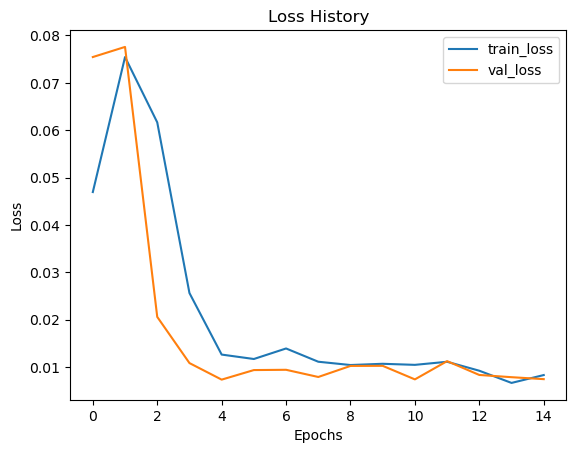

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

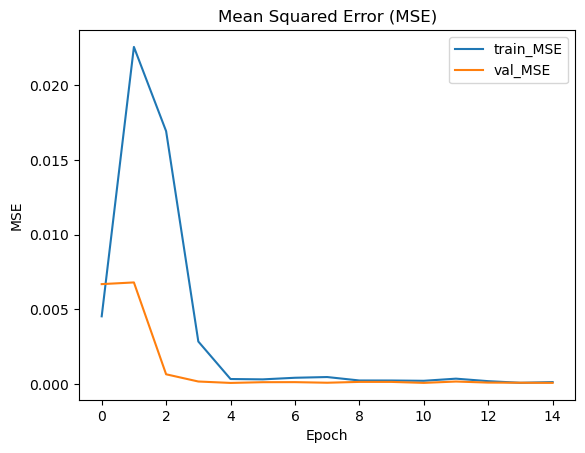

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

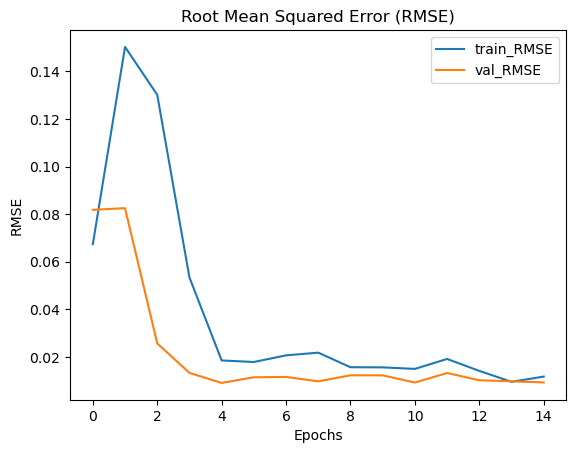

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

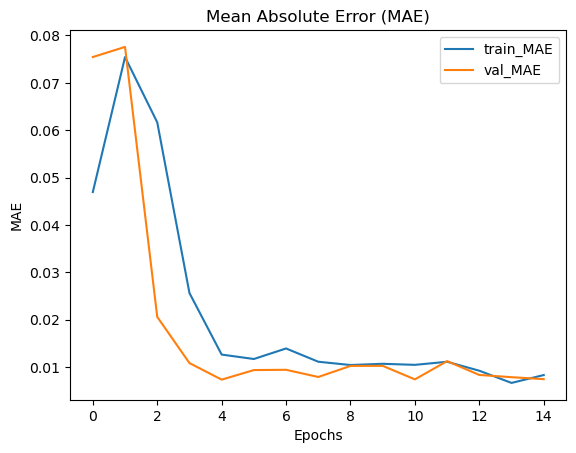

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

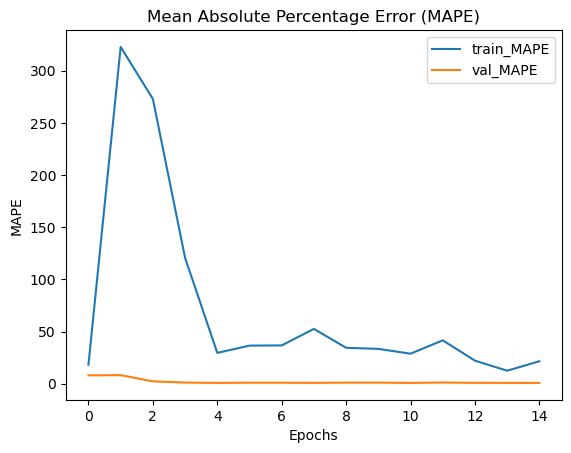

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 19:27:10.508636: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 1)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


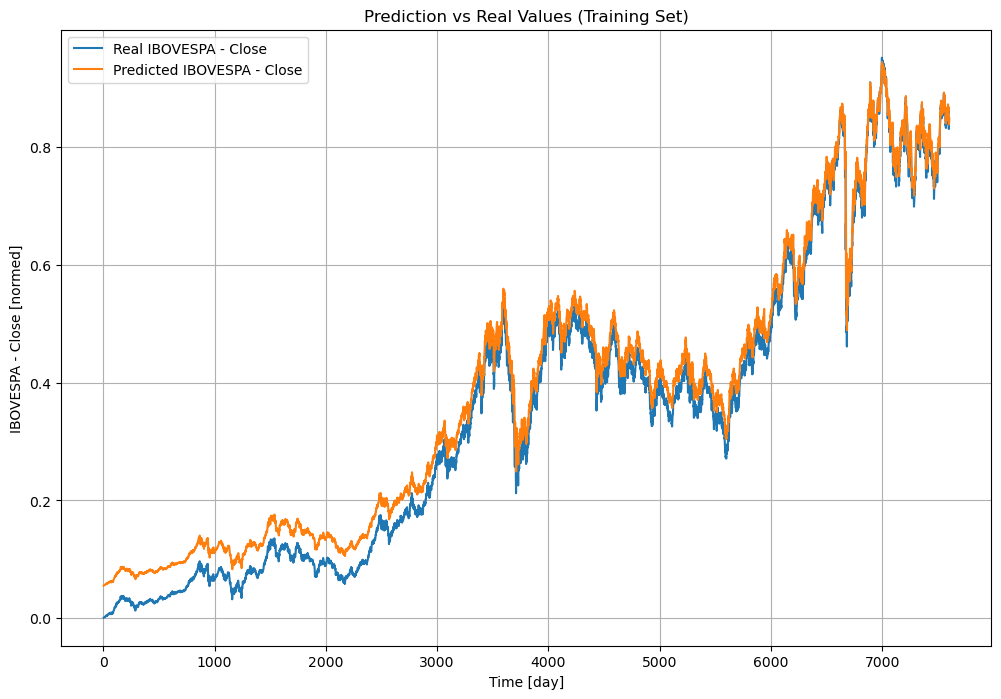

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 1)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


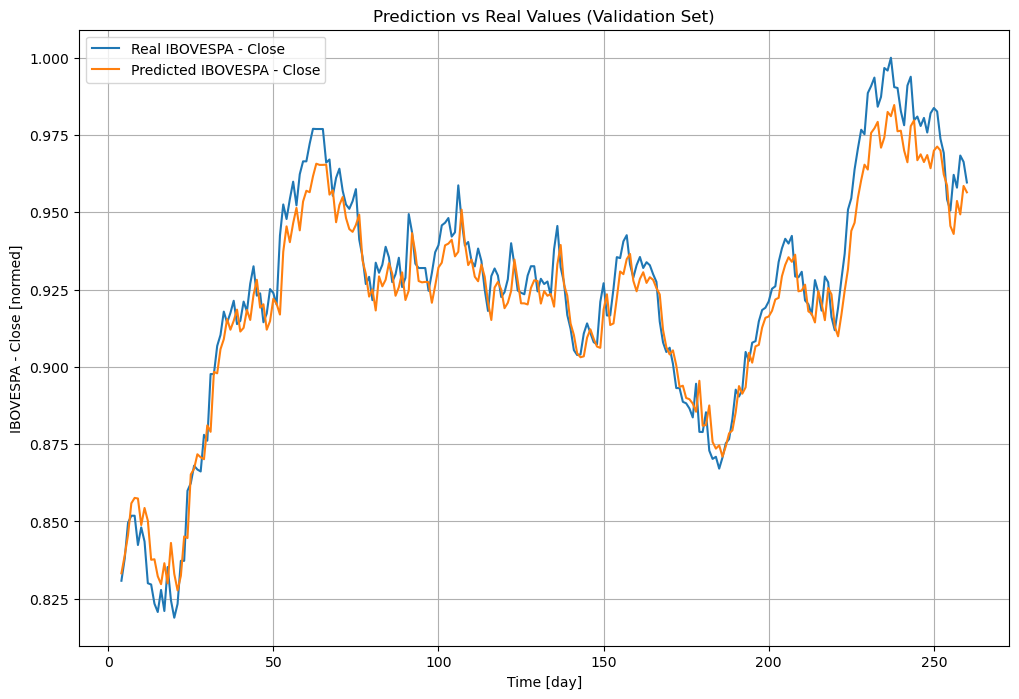

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 1)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


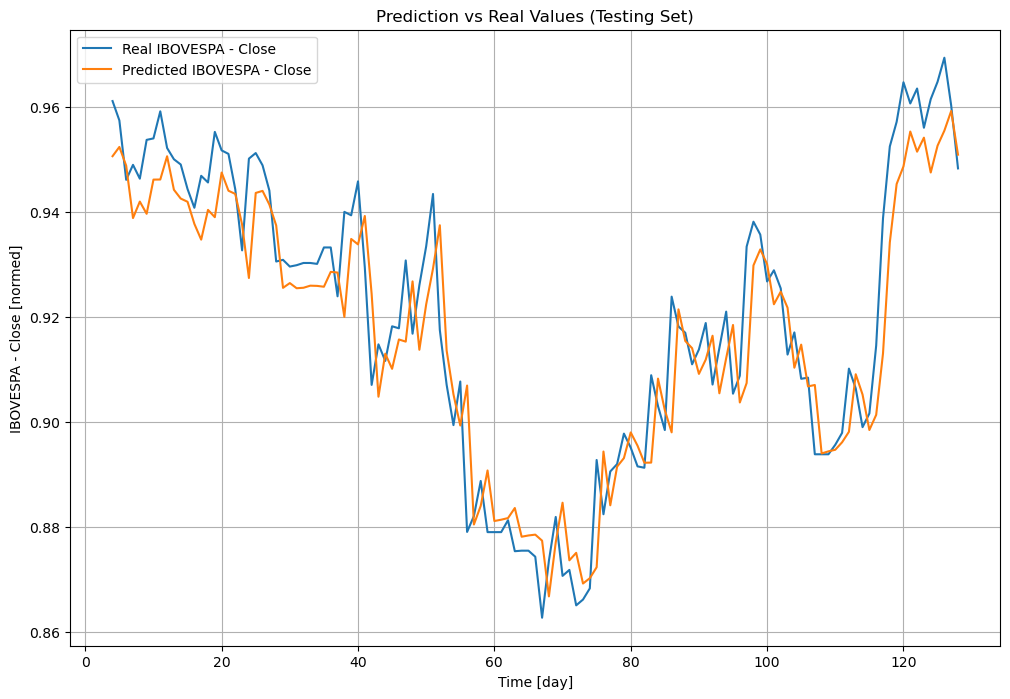

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

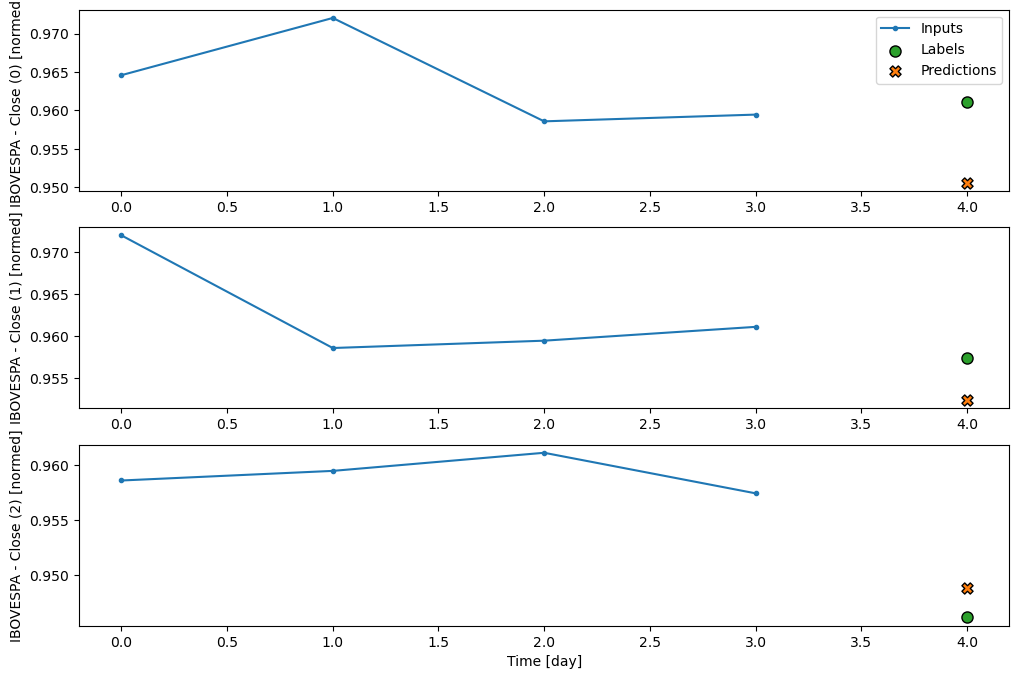

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:37s:601ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


array([[[0.9506054 , 0.9506054 , 0.9506054 , ..., 0.9506054 ,
         0.9506054 , 0.9506054 ]],

       [[0.9523686 , 0.9523686 , 0.9523686 , ..., 0.9523686 ,
         0.9523686 , 0.9523686 ]],

       [[0.94879746, 0.94879746, 0.94879746, ..., 0.94879746,
         0.94879746, 0.94879746]],

       ...,

       [[0.9554727 , 0.9554727 , 0.9554727 , ..., 0.9554727 ,
         0.9554727 , 0.9554727 ]],

       [[0.95921504, 0.95921504, 0.95921504, ..., 0.95921504,
         0.95921504, 0.95921504]],

       [[0.950894  , 0.950894  , 0.950894  , ..., 0.950894  ,
         0.950894  , 0.950894  ]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')